In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,NaN,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	10
float64		column 3	0
float64		column 4	8
float64		column 5	6
float64		column 6	2
float64		column 7	4
float64		column 8	14
float64		column 9	8
float64		column 10	4
float64		column 11	6
float64		column 12	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,796.000000,790.000000,800.000000,792.000000,794.000000,798.000000,796.000000,786.000000,792.000000,796.000000,794.000000,794.000000
mean,1.510117,1.259053,1.981231,1.929472,1.988890,2.004183,1.964376,1.996768,1.992163,1.980857,1.963784,1.960800
std,2.749419,3.637382,1.146890,1.160958,1.170671,1.143370,1.167362,1.135950,1.138461,1.155448,1.179850,1.124401
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.420648,-1.210815,1.020375,0.927960,0.965385,0.987023,0.951867,0.975108,1.058925,1.003828,0.911720,0.984635
50%,0.969530,0.614960,1.968150,1.889500,2.027350,2.006650,1.974400,2.006050,1.980000,1.992000,1.963900,1.950200
75%,3.975200,4.501675,2.925475,2.925925,2.997350,3.011400,2.989200,2.926625,2.988050,2.974450,3.033800,2.870700
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

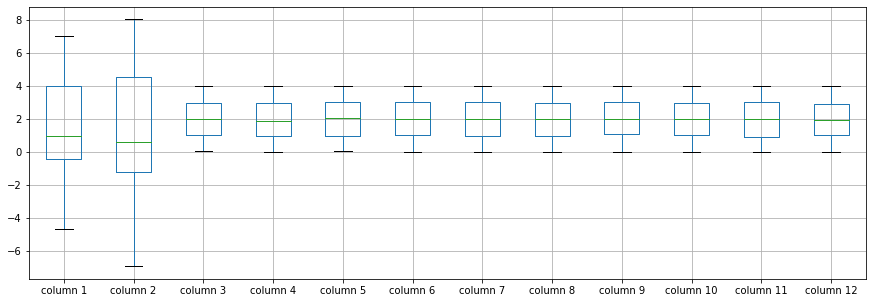

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.510117
column 2     1.259053
column 3     1.981231
column 4     1.929472
column 5     1.988890
column 6     2.004183
column 7     1.964376
column 8     1.996768
column 9     1.992163
column 10    1.980857
column 11    1.963784
column 12    1.960800
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.439596,-0.024414,0.000246,0.042055,0.048198,-0.000131,0.017529,-0.001263,0.005505,0.027731,0.031413
column 2,-0.439596,1.000000,-0.007137,-0.017969,-0.022630,-0.017597,0.031328,-0.015570,0.005707,-0.051876,-0.085945,0.024903
column 3,-0.024414,-0.007137,1.000000,-0.037160,0.078089,0.004367,0.035029,-0.006870,0.001391,-0.005025,-0.031968,0.004479
column 4,0.000246,-0.017969,-0.037160,1.000000,0.009363,-0.031018,0.043534,0.048593,-0.013165,0.044304,0.039517,-0.006801
column 5,0.042055,-0.022630,0.078089,0.009363,1.000000,0.052562,0.024072,0.012403,-0.009981,-0.014354,0.001001,0.011733
column 6,0.048198,-0.017597,0.004367,-0.031018,0.052562,1.000000,-0.070586,0.031065,0.016314,0.010554,-0.037227,0.001407
column 7,-0.000131,0.031328,0.035029,0.043534,0.024072,-0.070586,1.000000,-0.042238,-0.008019,-0.047776,-0.016725,-0.008301
column 8,0.017529,-0.015570,-0.006870,0.048593,0.012403,0.031065,-0.042238,1.000000,-0.058041,-0.040753,0.000949,-0.047504
column 9,-0.001263,0.005707,0.001391,-0.013165,-0.009981,0.016314,-0.008019,-0.058041,1.000000,0.051235,-0.017724,-0.022968
column 10,0.005505,-0.051876,-0.005025,0.044304,-0.014354,0.010554,-0.047776,-0.040753,0.051235,1.000000,-0.073792,0.050487


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+5,12+5+5,12+5+5,12+5+5+5+5,12+55+5+5,12+5+5,12+5,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.39316436767578
Epoch: 1 , loss: 29.26871726989746
Epoch: 2 , loss: 29.150103797912596
Epoch: 3 , loss: 29.035030632019044
Epoch: 4 , loss: 28.896603393554688
Epoch: 5 , loss: 28.69291072845459
Epoch: 6 , loss: 28.36775623321533
Epoch: 7 , loss: 27.687411460876465
Epoch: 8 , loss: 26.337034378051758
Epoch: 9 , loss: 23.902421646118164
Epoch: 10 , loss: 22.28093204498291
Epoch: 11 , loss: 21.710795860290528
Epoch: 12 , loss: 21.52584571838379
Epoch: 13 , loss: 21.361194610595703
Epoch: 14 , loss: 21.193186073303224
Epoch: 15 , loss: 21.149108085632324
Epoch: 16 , loss: 21.05856143951416
Epoch: 17 , loss: 21.154508934020996
Epoch: 18 , loss: 20.9790571975708
Epoch: 19 , loss: 20.92672462463379
Epoch: 20 , loss: 20.84091079711914
Epoch: 21 , loss: 20.612332801818848
Epoch: 22 , loss: 20.769433975219727
Epoch: 23 , loss: 20.922698097229002
Epoch: 24 , loss: 20.655320930480958
Epoch: 25 , loss: 20.7712610

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,-2.772016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(18.337844565981523, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.07387678753975724

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,0.694584,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NG_1(imp).xlsx", index=False, header=False)